In [64]:
import numpy as np

x_train = np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
y_train = np.array([-0.48, -0.78, -0.83, -0.67, -0.20, 0.70, 1.48, 1.17, 0.20])

centers = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])
radius = 0.6


def gaussian(x, center, sigma):
    return np.exp(-(np.linalg.norm(x - center) ** 2) / (2 * sigma ** 2))

G = np.zeros((len(x_train), len(centers)))

for i, x in enumerate(x_train):
    for j, c in enumerate(centers):
        G[i, j] = gaussian(x, c, radius)


weights = np.linalg.inv(G.T @ G) @ G.T @ y_train


def radial_basis_network(x, centers, weights, radius):
    output = 0
    for c, w in zip(centers, weights):
        output += w * gaussian(x, c, radius)
    return output

x_test = np.linspace(-2, 2, 100)
y_pred = [radial_basis_network(x, centers, weights, radius) for x in x_test]


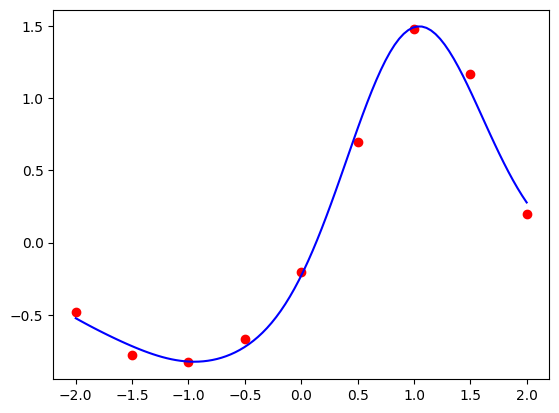

In [65]:
import matplotlib.pyplot as plt
plt.plot(x_test, y_pred ,color='b')
plt.scatter(x_train, y_train, color='r')
plt.show()